Source: https://github.com/PJY-609/MNIST-KNN/blob/master/KNN%2BMNIST.ipynb

In [1]:
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



2023-12-01 00:10:16.409356: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


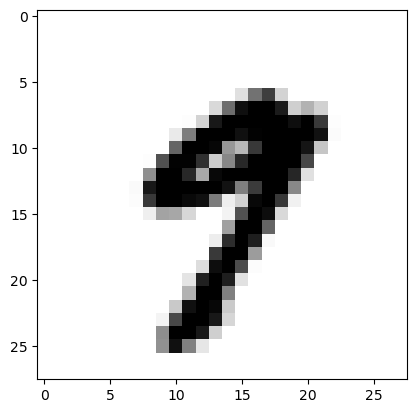

In [3]:
# plt.imshow(x_train[6], cmap='gray_r')
plt.imshow(x_test[20].reshape((28, 28)), cmap='gray_r')

In [4]:
# load the MNIST digits dataset
mnist = datasets.load_digits()
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
# import tensorflow as tf

# # Load the Fashion MNIST dataset
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# # Print the shape of the training data
# print("Shape of x_train:", x_train.shape)
# print()

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
# Training and testing split,
# 75% for training and 25% for testing
# (trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25)

# take 10% of the training data and use that for validation
# (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kVals = [1,5,10,20, 30]
accuracies = []
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28*28)
# print(flattened_array.shape)
# loop over kVals


In [9]:
x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')

In [10]:
x_train.shape

(60000, 784)

In [11]:
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(x_train, y_train)

    # evaluate the model and print the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=96.91%
k=5, accuracy=96.88%
k=10, accuracy=96.65%
k=20, accuracy=96.25%
k=30, accuracy=95.96%


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Train a Decision Tree on the data (Decision tree uses IG for the splits)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
importances = tree.feature_importances_

In [14]:
# Sort features by their importance
indices = np.argsort(importances)[::-1]

In [15]:
N = 50  # Change this to select number of features based on IG
selected_features = indices[:N]

In [16]:
# Apply the selection to training and test data
x_train_selected = x_train[:, selected_features]
x_test_selected = x_test[:, selected_features]

In [17]:
kVals = [1, 5, 10, 20, 30]
accuracies = []

for k in kVals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_selected, y_train)
    score = model.score(x_test_selected, y_test)
    print(f"k={k}, accuracy={score * 100:.2f}%")
    accuracies.append(score)

k=1, accuracy=93.15%
k=5, accuracy=93.81%
k=10, accuracy=93.45%
k=20, accuracy=92.94%
k=30, accuracy=92.56%
